In [1]:
print("Welcome to my EMR Notebook!")
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1653294769412_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Welcome to my EMR Notebook!
aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
boto3 (1.18.46)
botocore (1.21.65)
certifi (2021.5.30)
click (8.0.3)
cppy (1.1.0)
cycler (0.11.0)
Cython (0.29.24)
docutils (0.14)
jmespath (0.10.0)
joblib (1.1.0)
kiwisolver (1.4.2)
lockfile (0.11.0)
lxml (4.6.3)
matplotlib (3.4.3)
mysqlclient (1.4.2)
nltk (3.6.5)
nose (1.3.4)
numpy (1.21.2)
pandas (1.3.3)
Pillow (9.1.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.9)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.3)
PyYAML (5.4.1)
regex (2021.10.21)
s3transfer (0.5.2)
scipy (1.7.3)
seaborn (0.11.2)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.62.3)
typing-extensions (4.2.0)
ua-parser (0.10.0)
urllib3 (1.26.9)
user-agents (2.2.0)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf un

In [2]:
# Starter code

#from pyspark.sql import SparkSession

#os.environ['PYSPARK_PYTHON'] = "./pyspark_venv/bin/python"
# Create spark session
#spark = SparkSession \
#    .builder \
#    .appName("Sparkify") \
#    .getOrCreate()

#    .config( \
#    "spark.archives",  \
#    "pyspark_venv.tar.gz#environment") \

# Read in full sparkify dataset
#event_data = "./mini_sparkify_event_data.json"
#event_data = "s3n://udacity-dsnd/sparkify/mini_sparkify_event_data.json"
event_data = "s3n://udacity-dsnd/sparkify/sparkify_event_data.json"
df = spark.read.json(event_data)
df.persist()
df.createOrReplaceTempView('df')
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist='Popol Vuh', auth='Logged In', firstName='Shlok', gender='M', itemInSession=278, lastName='Johnson', length=524.32934, level='paid', location='Dallas-Fort Worth-Arlington, TX', method='PUT', page='NextSong', registration=1533734541000, sessionId=22683, song='Ich mache einen Spiegel - Dream Part 4', status=200, ts=1538352001000, userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1749042')

In [3]:
import datetime 
import user_agents 
import numpy as np
import pandas as pd
from pyspark.sql.types import IntegerType
import matplotlib as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# hello world
df.limit(10).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+-------+
|            artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|       page| registration|sessionId|                song|status|           ts|           userAgent| userId|
+------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+-------+
|      Ryan Cabrera|Logged In|  Karissa|     F|           66|    Hill|216.94649| paid|    St. Louis, MO-IL|   PUT|   NextSong|1537348076000|    18524|Photo (Album Vers...|   200|1538507092000|"Mozilla/5.0 (Win...|1174391|
|       Ace of Base|Logged In|     Emma|     F|            0|Jacobson|228.38812| free|         Holland, MI|   PU

## Data cleaning

In [5]:
# check for null values in the dataset
spark.sql('''
select * from df 
where userId is null or sessionId is null or itemInsession is null or page is null or registration is null or ts is null
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+-------+
|artist|      auth|firstName|gender|itemInSession|lastName|length|level|location|method| page|registration|sessionId|song|status|           ts|userAgent| userId|
+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+-------+
|  null|Logged Out|     null|  null|           87|    null|  null| paid|    null|   GET| Home|        null|     8615|null|   200|1538352008000|     null|1261737|
|  null|Logged Out|     null|  null|            0|    null|  null| free|    null|   PUT|Login|        null|     7433|null|   307|1538352041000|     null|1261737|
|  null|Logged Out|     null|  null|            4|    null|  null| free|    null|   GET| Home|        null|    25003|null|   200|1538352182000|     null|1261737|
|  null|Logged Out|     null

In [6]:
# how do we know the userid if the auth state is Logged Out ?
spark.sql('''
select distinct userId from df 
where auth = 'Logged Out' 
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+
| userId|
+-------+
|1261737|
+-------+

In [7]:
# seems to be a pseudo user id used for logged out users
spark.sql('''
select distinct auth from df 
where userId = '1261737'
''').show()

# let's see which auth states may happen?
spark.sql('''
select distinct auth from df 
--where userId = '1261737'
''').show()

# what pages is auth state Cancelled used for?
spark.sql('''
select distinct page from df 
where auth = 'Cancelled'
''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+
|      auth|
+----------+
|Logged Out|
|     Guest|
+----------+

+----------+
|      auth|
+----------+
|Logged Out|
|     Guest|
| Cancelled|
| Logged In|
+----------+

+--------------------+
|                page|
+--------------------+
|Cancellation Conf...|
+--------------------+

In [8]:
# interactions in state Logged Out don't help us as they are not assigned to a user
spark.sql('''
select distinct page 
from df
where auth = 'Logged Out'
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+
| page|
+-----+
|Error|
| Help|
| Home|
|About|
|Login|
+-----+

In [4]:
# Let's get rid of the auth Logged Out and Guest lines in the dataset
dfc = spark.sql('''
select artist
    , auth 
    , firstName
    , gender
    , itemInSession
    , lastName
    , length
    , level
    , location
    , method
    , page
    , registration
    , sessionId
    , song
    , status
    , ts
    , sha(userAgent) as agentKey -- surrogate key
    , userId
from df
where auth IN ( 'Logged In', 'Cancelled')
''')
dfc.persist()
dfc.createOrReplaceTempView('dfc')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Funnel analysis

Let's figure out if there are particular page/action flows around the downgrade and cancellation

In [10]:
# which pages exist and how often are the presented
spark.sql('''
select count(*), page 
from dfc
group by page
order by count(*) desc
''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-------------------------+
|count(1)|page                     |
+--------+-------------------------+
|20850272|NextSong                 |
|1151465 |Thumbs Up                |
|933124  |Home                     |
|597921  |Add to Playlist          |
|385212  |Roll Advert              |
|381664  |Add Friend               |
|296005  |Logout                   |
|239212  |Thumbs Down              |
|184240  |Downgrade                |
|147074  |Settings                 |
|129448  |Help                     |
|50507   |Upgrade                  |
|48377   |About                    |
|29516   |Save Settings            |
|25048   |Error                    |
|15135   |Submit Upgrade           |
|6494    |Submit Downgrade         |
|5003    |Cancel                   |
|5003    |Cancellation Confirmation|
+--------+-------------------------+

In [32]:
# what happens before and after downgrade and cancellation?
def funnel_sql(page):
    return '''
        WITH surrounding_page AS (
        select row_number() over user_sessions as row_number
            , LAG(page, 2) over user_sessions as before_before_page
            , LAG(level, 2) over user_sessions as before_before_level
            , LAG(page, 1) over user_sessions as before_page
            , LAG(level, 1) over user_sessions as before_level
            , LEAD(page, 1) over user_sessions as after_page
            , LEAD(level, 1) over user_sessions as after_level
            , LEAD(page, 2) over user_sessions as after_after_page
            , LEAD(level, 2) over user_sessions as after_after_level
            , dfc.*
        from dfc
        window user_sessions as (partition by userId, sessionId order by itemInSession)
    )

    select count(*)
        , before_before_page
        , before_before_level
        , before_page
        , before_level
        , page
        , level
        , after_page
        , after_level
        , after_after_page
        , after_after_level
    from surrounding_page 
    where page IN ( '{0}' )
    group by before_before_page
        , before_before_level
        , before_page
        , before_level
        , page
        , level
        , after_page
        , after_level
        , after_after_page
        , after_after_level
    order by count(*) desc
    '''.format(page)

for p in ['Cancel', 'Submit Downgrade', 'Downgrade']:
    spark.sql(funnel_sql(p)).show(30)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------------------+-------------------+-----------+------------+------+-----+--------------------+-----------+----------------+-----------------+
|count(1)|before_before_page|before_before_level|before_page|before_level|  page|level|          after_page|after_level|after_after_page|after_after_level|
+--------+------------------+-------------------+-----------+------------+------+-----+--------------------+-----------+----------------+-----------------+
|    1834|          NextSong|               paid|  Downgrade|        paid|Cancel| paid|Cancellation Conf...|       paid|            null|             null|
|    1059|          NextSong|               free|Roll Advert|        free|Cancel| free|Cancellation Conf...|       free|            null|             null|
|     468|          NextSong|               paid|   Settings|        paid|Cancel| paid|Cancellation Conf...|       paid|            null|             null|
|     337|          NextSong|               paid|Roll Advert|   

### Findings


As it seems *Downgrade* is a page which features a downgrade button. The click is logged as *Submit Downgrade* and the user is directed to the *Home* page afterwards. 

Compared to that *Cancel* seems to be accessible from every page (which is a bit ridiculous as you typically would avoid churn by hiding the button somewhere deep in the settings or so). *Cancel* is followed by the *Cancel confirmation* page and the session ends.

As a side finding it might happen that adverts are rolled in the paid level (even twice in a row), which might trigger cancellations. Let's look into this

In [35]:
# let's see how many paid and free actions we have
spark.sql('''
select level, count(*)
from dfc
group by level
''').show()

# how many adverts do we roll on each level?
spark.sql('''
select level, count(*)
from dfc
where page = 'Roll Advert'
group by level
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------+
|level|count(1)|
+-----+--------+
| free| 5408240|
| paid|20072480|
+-----+--------+

+-----+--------+
|level|count(1)|
+-----+--------+
| free|  363243|
| paid|   21969|
+-----+--------+

## User Agent

In [43]:
# which user agents are present in the dataset, how many?
spark.sql('''
select userAgent, count(*)
from df
where 1=1 
group by userAgent
order by count(*) desc
''').show(truncate=False)

spark.sql('''
select count(distinct userAgent)
from df
''').show(50, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------------------------------------------------------------------------------------------------+--------+
|userAgent                                                                                                                                  |count(1)|
+-------------------------------------------------------------------------------------------------------------------------------------------+--------+
|"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"                            |2400726 |
|Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0                                                                   |1962722 |
|"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"                            |1562542 |
|"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome

In [24]:
# how about the null user agent?
spark.sql('''
select distinct auth, page
from df
where useragent is null
''').show(50, truncate=False)

spark.sql('''
select distinct auth, page
from dfc
where agentKey is null
''').show(50, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------------+
|auth      |page               |
+----------+-------------------+
|Logged Out|Login              |
|Guest     |Register           |
|Logged Out|Error              |
|Guest     |About              |
|Guest     |Error              |
|Guest     |Submit Registration|
|Logged Out|Home               |
|Logged Out|Help               |
|Guest     |Home               |
|Logged Out|About              |
|Guest     |Help               |
+----------+-------------------+

+----+----+
|auth|page|
+----+----+
+----+----+

In [5]:
# get an extraction of the user agents to do the compute intensive parsing seperately
agents = spark.sql('''
select distinct sha(userAgent) as agentKey, userAgent
from df
where userAgent is not null
''')
agents.createOrReplaceTempView('agents')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
agents.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|            agentKey|           userAgent|
+--------------------+--------------------+
|e28d9e118982f8bc9...|"Mozilla/5.0 (Mac...|
|65ca5417945672c2f...|"Mozilla/5.0 (Win...|
|55a623d0b13d10807...|"Mozilla/5.0 (Mac...|
|d7c4951bf12122a19...|"Mozilla/5.0 (iPa...|
|42c5d6a9cd00dc7a3...|Mozilla/5.0 (Wind...|
|533c27032e49077a6...|Mozilla/5.0 (X11;...|
|aa739e3aaaa1fbfc8...|Mozilla/5.0 (comp...|
|8e31ab4aa4b512786...|"Mozilla/5.0 (X11...|
|6660d6e13c29fa993...|Mozilla/5.0 (Maci...|
|a7aeb969fa9c35306...|Mozilla/5.0 (X11;...|
|7e59df8b3d2e55069...|Mozilla/5.0 (Wind...|
|a313b88168e79f7cc...|Mozilla/5.0 (Wind...|
|970a85d655b7aad6d...|Mozilla/5.0 (X11;...|
|bfa4fbf28a93a2268...|"Mozilla/5.0 (Mac...|
|60c99777c4a383749...|"Mozilla/5.0 (Mac...|
|145ca45d9bf38520c...|"Mozilla/5.0 (Mac...|
|6a1661efe3c936b49...|Mozilla/5.0 (comp...|
|be6e1263118fc8e2f...|"Mozilla/5.0 (Mac...|
|bb58e0b82b2baac6d...|"Mozilla/5.0 (Win...|
|7b10b5771034cd7d2...|Mozilla/5.

In [37]:
result = user_agents.parse("Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36").browser.family
print(result)
type(result)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Chrome
<class 'str'>

In [17]:
spark.udf.register("browser_from_agent", lambda x: user_agents.parse(x).browser.family)
spark.udf.register("os_from_agent", lambda x: user_agents.parse(x).os.family)
spark.udf.register("device_from_agent", lambda x: user_agents.parse(x).device.family)
spark.udf.register("mobile_from_agent", lambda x: 1 if user_agents.parse(x).is_mobile else 0)
spark.udf.register("tablet_from_agent", lambda x: 1 if user_agents.parse(x).is_tablet else 0)
spark.udf.register("pc_from_agent", lambda x: 1 if user_agents.parse(x).is_pc else 0)
spark.udf.register("brand_from_agent", lambda x: 1 if user_agents.parse(x).device.brand == 'Apple' else 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function <lambda> at 0x7f01799a9d40>

In [19]:
agents = spark.sql('''
select distinct sha(userAgent), userAgent
from agents
where userAgent is not null
''')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
agents_parsed = spark.sql('''
select agentKey, userAgent
    --, browser_from_agent(userAgent) as browser
    --, os_from_agent(userAgent) as os
    --, device_from_agent(userAgent) as device
    , mobile_from_agent(userAgent) as mobile
    , tablet_from_agent(userAgent) as tablet
    , pc_from_agent(userAgent) as pc
    , brand_from_agent(userAgent) as is_apple
from agents 
''')
agents_parsed.createOrReplaceTempView('agents_parsed')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
spark.sql('''
select mobile, tablet, pc, is_apple, count(*)
from agents_parsed
group by mobile, tablet, pc, is_apple
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+------+---+--------+--------+
|mobile|tablet| pc|is_apple|count(1)|
+------+------+---+--------+--------+
|     1|     0|  0|       1|       4|
|     0|     1|  0|       1|       2|
|     0|     0|  1|       0|      42|
|     0|     0|  1|       1|      37|
+------+------+---+--------+--------+

In [24]:
# join back on surrogate key
dfe = spark.sql('''
select * from dfc
JOIN agents_parsed USING (agentKey)
''')
dfe.createOrReplaceTempView('dfe')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
dfe.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+---------+-------------+---------+--------------------+------+-------------+-------+--------------------+------+------+---+--------+
|            agentKey|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|     page| registration|sessionId|                song|status|           ts| userId|           userAgent|mobile|tablet| pc|is_apple|
+--------------------+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+---------+-------------+---------+--------------------+------+-------------+-------+--------------------+------+------+---+--------+
|7e59df8b3d2e55069...|                null|Logged In|  Allyson|     F|          103|    Gibbs|     null| free|Phoenix-Mesa-Scot...|   PUT|   Logout|1535509827000|    37680|               

## Get some insight into the timeseries

In [38]:
# how many users do we have in the data
spark.sql('''
select count(distinct userId)
from dfc
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+
|count(DISTINCT userId)|
+----------------------+
|                 22277|
+----------------------+

In [42]:
# which timespan is covered?
spark.sql('''
select from_unixtime(min(ts) / 1000) as start
    , from_unixtime(max(ts) / 1000) as end
from dfc
''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+
|start              |end                |
+-------------------+-------------------+
|2018-10-01 00:00:01|2018-12-01 00:00:02|
+-------------------+-------------------+

In [46]:
# is the sessionId unique or can multiple users have the same sessionId ?
spark.sql('''
select sessionId, count(distinct userId)
from dfc
group by sessionId
order by sessionId
''').show(10)

spark.sql('''
select distinct sessionId,  userId
from dfc
where sessionId=1
''').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------------------+
|sessionId|count(DISTINCT userId)|
+---------+----------------------+
|        1|                     3|
|        2|                     1|
|        3|                     2|
|        4|                     1|
|        5|                     2|
|        6|                     2|
|        7|                     1|
|        9|                     3|
|       10|                     3|
|       11|                     3|
+---------+----------------------+
only showing top 10 rows

+---------+-------+
|sessionId| userId|
+---------+-------+
|        1|1071257|
|        1|1551454|
|        1|1265018|
+---------+-------+

In [48]:
# is itemInSession ascending as the timestamp?
spark.sql('''
WITH timedeltas AS (
    select ts - LAG(ts, 1) over user_sessions as deltatime
    from dfc
    window user_sessions as (partition by userId, sessionId order by itemInSession)
)

select * from timedeltas
where deltatime < 0
''').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|deltatime|
+---------+
+---------+

In [49]:
# do users downgrade multiple times?
spark.sql('''
select userId, count(*)
from dfc
where 1=1 
and page IN ('Submit Downgrade')
group by userId
order by count(*) desc
''').limit(10).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------+
| userId|count(1)|
+-------+--------+
|1662781|       7|
|1343763|       6|
|1747195|       6|
|1782082|       6|
|1287039|       6|
|1186318|       5|
|1345577|       5|
|1255222|       5|
|1663631|       5|
|1249037|       5|
+-------+--------+

## Churn analysis

In [37]:
spark.sql('''
select page, level, count(*)
from dfc
group by page, level
order by page, level
''').show(60, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------+-----+--------+
|page                     |level|count(1)|
+-------------------------+-----+--------+
|About                    |free |10490   |
|About                    |paid |37887   |
|Add Friend               |free |83453   |
|Add Friend               |paid |298211  |
|Add to Playlist          |free |112603  |
|Add to Playlist          |paid |485318  |
|Cancel                   |free |1579    |
|Cancel                   |paid |3424    |
|Cancellation Confirmation|free |1579    |
|Cancellation Confirmation|paid |3424    |
|Downgrade                |paid |184240  |
|Error                    |free |5474    |
|Error                    |paid |19574   |
|Help                     |free |28018   |
|Help                     |paid |101430  |
|Home                     |free |253874  |
|Home                     |paid |679250  |
|Logout                   |free |90392   |
|Logout                   |paid |205613  |
|NextSong                 |free |4080447 |
|NextSong  

In [78]:
spark.udf.register("get_hour", lambda x: int(datetime.datetime.utcfromtimestamp(x / 1000.0).hour), IntegerType())
spark.udf.register("get_day_of_month", lambda x: int(datetime.datetime.utcfromtimestamp(x / 1000.0).day), IntegerType())

spark.udf.register("get_hour2", lambda x: int(x / 3600000), IntegerType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function <lambda> at 0x7fe15c2e7c20>

In [11]:
 spark.stop()

VBox()

An error was encountered:
Session 0 did not reach idle status in time. Current status is busy.


In [86]:
spark.sql('''
select from_unixtime(ts / 1000) as hour from dfc
--group by hour
--order by hour
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|               hour|
+-------------------+
|2018-10-01 21:10:38|
|2018-10-01 21:15:45|
|2018-10-01 21:19:30|
|2018-10-01 21:25:21|
|2018-10-01 21:29:23|
|2018-10-01 21:32:53|
|2018-10-01 21:32:54|
|2018-10-01 21:36:11|
|2018-10-01 21:38:24|
|2018-10-01 21:39:31|
|2018-10-01 21:39:32|
|2018-10-01 21:43:27|
|2018-10-01 21:46:41|
|2018-10-01 21:46:46|
|2018-10-01 21:46:53|
|2018-10-01 21:46:54|
|2018-10-01 21:49:34|
|2018-10-01 21:50:37|
|2018-10-01 21:54:03|
|2018-10-01 21:55:11|
+-------------------+
only showing top 20 rows

In [77]:
sns.barplot(data=hourly_usage, x="hour", y="interaction_count")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'sns' is not defined
Traceback (most recent call last):
NameError: name 'sns' is not defined



In [87]:
monthly_usage = spark.sql('''
select dayofmonth(from_unixtime(ts / 1000)) as day, sum(case when page IN('Submit Downgrade', 'Cancellation Confirmation') then 1 else 0 end) as churn, count(*) as interaction_count from df
group by day
order by day
''').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [88]:
monthly_usage

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    day  churn  interaction_count
0     1    425             935368
1     2    460             982324
2     3    375             799309
3     4    361             792740
4     5    393             938104
5     6    358             804919
6     7    344             777161
7     8    423             966711
8     9    414             999356
9    10    374             835036
10   11    384             798376
11   12    431             951970
12   13    358             825031
13   14    309             759492
14   15    443             959315
15   16    415             986690
16   17    351             809526
17   18    330             783562
18   19    398             950183
19   20    340             799089
20   21    319             755016
21   22    367             767159
22   23    382             912083
23   24    358             792532
24   25    347             777617
25   26    396             914437
26   27    338             779472
27   28    301             737435
28   29    375

In [89]:
sns.barplot(data=monthly_usage, x="day", y="interaction_count")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'sns' is not defined
Traceback (most recent call last):
NameError: name 'sns' is not defined



In [90]:
dfc = spark.sql('''
with cancel_flagged_df as (
    select df.*
        , case page when 'Cancellation Confirmation' then 1 else 0 end as cancel_event 
        from df
        where userId is not null and sessionId is not null
)

select auth, gender, itemInSession, length, level, page, registration, sessionId, status, ts, userAgent, userId
    , sum(cancel_event) over (partition by userId rows between unbounded preceding and unbounded following) as churn
    from cancel_flagged_df
''')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [91]:
dfc.persist()
dfc.createOrReplaceTempView('dfc')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
spark.sql('''
select churn, count(distinct userId) 
from dfc
group by churn
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   churn  count(DISTINCT userId)
0      1                    5003
1      0                   17275

In [52]:
page_use_by_churn = spark.sql('''
with page_activity as (
    select page, churn, count(*) as interaction_count
    from dfc
    group by page, churn
    order by page, churn
)

select page, churn, interaction_count / sum(interaction_count)  over (partition by churn) * 100 as percent
from page_activity
where page != 'NextSong'
order by page, churn
''').toPandas().pivot(index='page', columns='churn', values='percent')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

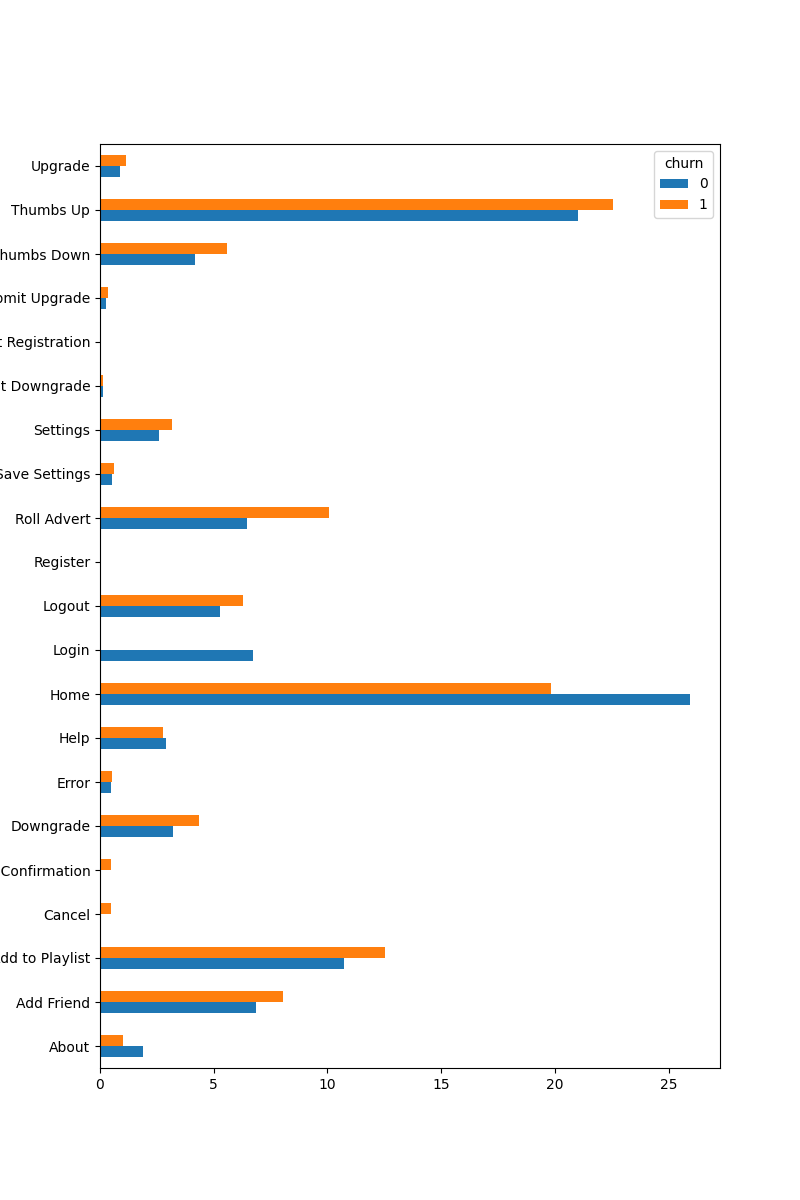

In [64]:

page_use_by_churn.plot.barh(figsize=(8,12))
%matplot plt

In [65]:
dfc.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- auth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- churn: long (nullable = true)

In [66]:
spark.sql('''with user_levels as (
    select userId, churn, sum(case when level = 'free' then 1 else 0 end) as free
    , sum(case when level = 'paid' then 1 else 0 end) as paid, count(*) c
    from dfc
    group by userId,  churn
)

select churn, sum(case when free > 0 then 1 else 0 end) as free_usage
, sum(case when paid > 0 then 1 else 0 end) as paid_usage
, sum(case when paid > 0 and free > 0 then 1 else 0 end) as both
from user_levels
group by churn
''').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   churn  free_usage  paid_usage  both
0      1        4147        3891  3035
1      0       14646       12294  9665